# FlowEmbedder: Snake Test Case

In [ ]:
# default_exp datasets
# hide
from nbdev.showdoc import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Pseudo Code

1) create function that is the "ribbon"
2) sample points from ribbon
3) calculate flow at each point

# Test Example 1: 3D Sinusoidal

In [ ]:
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

In [ ]:
def plot_ribbon(start=-5, end=5.1, increment=0.2, num_points=1000, dim=3):
    '''
    plots sinusoidal ribbon manifold in 3D
    Inputs
    - start: starting point of sinusoidal function
    - end: ending point of sinusoidal function
    - increment: segment size between start and ed
    - num_points: number of points sampled from the sinusoidal manifold
    '''
    fig = plt.figure(figsize = (12,10))
    ax = plt.axes(projection='3d')

    x = np.arange(start, end, increment)
    y = np.arange(start, end, increment)

    X, Y = np.meshgrid(x, y)
    # define function
    Z = np.sin(X)

    surf = ax.plot_surface(X, Y, Z, cmap = plt.cm.cividis)

    # label axis
    ax.set_xlabel('x', labelpad=20)
    ax.set_ylabel('y', labelpad=20)
    ax.set_zlabel('z', labelpad=20)

    fig.colorbar(surf, shrink=0.5, aspect=8)

    plt.show()

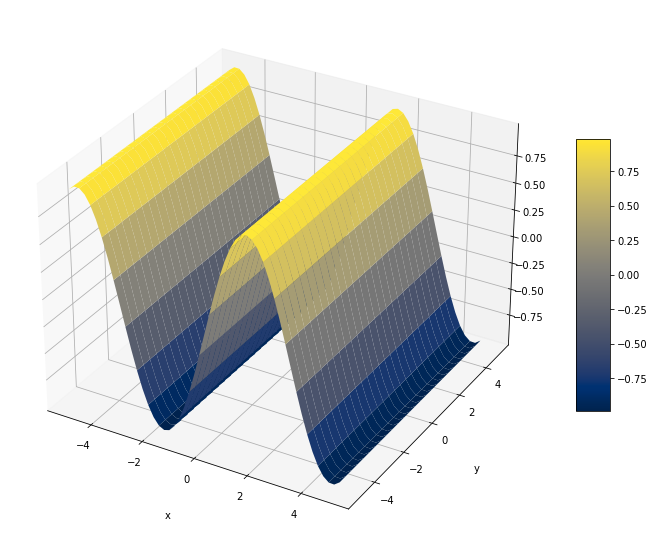

In [ ]:
# plot ribbon

plot_ribbon()

In [ ]:
def sample_ribbon(start=-5, end=5.1, increment=0.2, num_points=1000, dim=3):
    '''
    sample points uniformly from ribbon
    Inputs
    - start: starting point of sinusoidal function
    - end: ending point of sinusoidal function
    - increment: segment size between start and ed
    - num_points: number of points sampled from the sinusoidal manifold
    Outputs
    - points_mat:
    - flow_mat:
    '''
    # sample points
    sample_x = np.random.uniform(low=start, high=end, size = num_points)
    sample_y = np.random.uniform(low=start, high=end, size = num_points)

    points_mat = np.ndarray(shape=(num_points, dim))
    points_mat[:, 0] = sample_x
    points_mat[:, 1] = sample_y
    points_mat[:, 2] = np.sin(sample_x)

    # calculate flow: unit tangent line at each sampled point
    flow_mat = np.ndarray(shape = (num_points, dim))
    flow_mat[:, 0] = [1] * num_points
    flow_mat[:, 1] = [1] * num_points
    flow_mat[:, 2] = np.cos(sample_x)
    # row normalize
    row_sums = flow_mat.sum(axis=1)
    flow_mat = flow_mat / row_sums[:, np.newaxis]

    return points_mat, flow_mat


In [ ]:
X = sample_ribbon()[0] # points
X_ = sample_ribbon()[1] # flows

In [ ]:
def plot_ribbon_samples(points_mat, flow_mat):
    '''
    plot points sampled from the manifold with flow at each point, 
    where flow is defined as the unit tangent vector at each point
    Inputs
    - points_mat: matrix where each row is a point
    - flow_mat: matrix where each row is a derivative of each corresponding point in points_mat
    '''
    num_points, d = points_mat.shape
    fig = plt.figure(figsize = (12,10))
    ax = fig.add_subplot(projection='3d')

    # plot points
    plt.scatter(points_mat[:, 0], points_mat[:, 1], points_mat[:, 2])

    # plot flow
    mask_prob = 0 # percentage not plotted
    mask = np.random.rand(num_points) > mask_prob
    ax.quiver(points_mat[mask, 0], points_mat[mask, 1], points_mat[mask, 2], flow_mat[mask, 0], flow_mat[mask, 1], flow_mat[mask, 2], alpha=0.8, length=0.5)

    # label axis
    ax.set_xlabel('x', labelpad=20)
    ax.set_ylabel('y', labelpad=20)
    ax.set_zlabel('z', labelpad=20)

    plt.show()



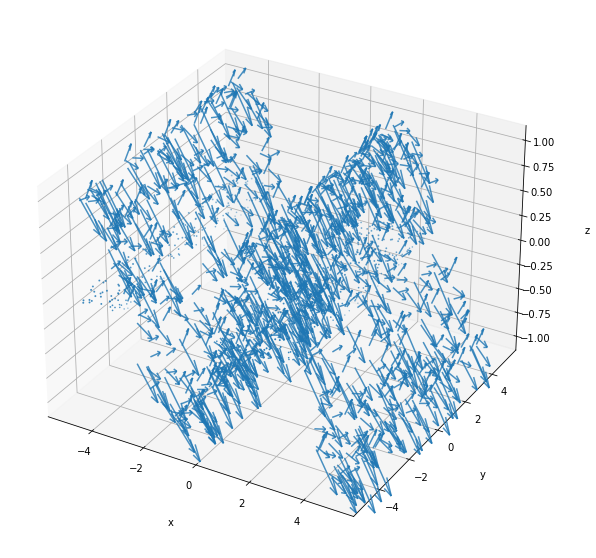

In [ ]:
plot_ribbon_samples(X, X_)

References

[1] https://pythonnumericalmethods.berkeley.edu/notebooks/chapter12.02-3D-Plotting.html


## Test on Flow Embedder

In [ ]:
import torch
from directed_graphs.datasets import directed_circle, directed_cylinder, directed_spiral, directed_swiss_roll
from directed_graphs.datasets import plot_directed_2d, plot_directed_3d
from directed_graphs.diffusion_flow_embedding import DiffusionFlowEmbedder
import torch
import numpy as np

if torch.__version__[:4] == "1.13":
	# device = torch.device('cuda' if torch.cuda.is_available() else 'mps' if torch.has_mps else 'cpu')
	device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
else:
	device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [ ]:
data, flow = sample_ribbon()

In [ ]:
X = torch.tensor(data)
flow = torch.tensor(flow)
X = X.float().to(device)
flow = flow.float().to(device)

  0%|          | 0/2000 [00:00<?, ?it/s]

EPOCH 0. Loss 1507.2281494140625. Flow strength 4.999000072479248. Heatmap of P embedding is 


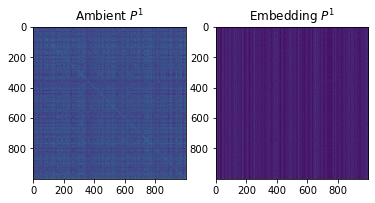

  2%|▏         | 46/2000 [00:16<11:13,  2.90it/s]

In [ ]:
dfe = DiffusionFlowEmbedder(X,flow,t=1,sigma_graph=4,sigma_embedding=4,device = device,flow_strength=5,learnable_flow_strength=True)
dfe = dfe.to(device)
embeddings = dfe.fit(n_steps=2000)

In [ ]:
dfe.embedded_points

tensor([[ 1.0161,  1.5939],
        [ 0.1839,  2.7196],
        [ 1.5257, -1.3521],
        ...,
        [ 0.8624, -1.9266],
        [-2.2297,  3.9026],
        [ 2.1065, -0.5322]], grad_fn=<AddmmBackward0>)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


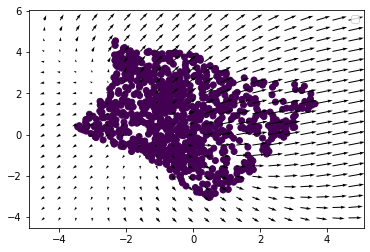

In [ ]:
dfe.visualize_points([0 for i in range(len(data))])